### Description

#### Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

 

#### Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

 

#### Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

### Data Dictionary

* S.No.: Serial number
* Name: Name of the car which includes brand name and model name
* Location: Location in which the car is being sold or is available for purchase (cities)
* Year: Manufacturing year of the car
* Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
* Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission: The type of transmission used by the car (Automatic/Manual)
* Owner: Type of ownership
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in CC
* Power: The maximum power of the engine in bhp
* Seats: The number of seats in the car
* New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
* Price: The price of the used car in INR Lakhs

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor


<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
df = pd.read_csv("used_cars_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 7253 rows and 14 columns.


<IPython.core.display.Javascript object>

In [4]:
# to view first 5 rows of the dataset
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<IPython.core.display.Javascript object>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [7]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [9]:
np.random.seed(1)
df.sample(n=15)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


<IPython.core.display.Javascript object>

In [10]:
# replaced the units of milage,
replaceMilageUNits = {"kmpl": "", "km/kg": ""}
df["Mileage"] = df["Mileage"].replace(replaceMilageUNits, regex=True)
# convert column into numeric
df["Mileage"] = pd.to_numeric(df["Mileage"])
df["Mileage"]

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
7248    20.54
7249    17.21
7250    23.08
7251    17.20
7252    10.00
Name: Mileage, Length: 7253, dtype: float64

<IPython.core.display.Javascript object>

In [11]:
# replace cc and bhp as well and then conver the columns to numeric

replaceCCBHP = {"CC": "", "bhp": ""}
df["Engine"] = df["Engine"].replace(replaceCCBHP, regex=True)
df["Power"] = df["Power"].replace(replaceCCBHP, regex=True)
# convert column into numeric
df["Power"] = pd.to_numeric(df["Power"])
df["Engine"] = pd.to_numeric(df["Engine"])
print(df["Power"])
print(df["Engine"])

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
7248    103.60
7249    103.60
7250     63.10
7251    103.60
7252    170.00
Name: Power, Length: 7253, dtype: float64
0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
7248    1598.0
7249    1197.0
7250    1461.0
7251    1197.0
7252    2148.0
Name: Engine, Length: 7253, dtype: float64


<IPython.core.display.Javascript object>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

In [13]:
print(pd.unique(df["Owner_Type"]))
print(pd.unique(df["Transmission"]))
print(pd.unique(df["Fuel_Type"]))
print(df["Location"].value_counts())
df["Name"].value_counts()

['First' 'Second' 'Fourth & Above' 'Third']
['Manual' 'Automatic']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64


Mahindra XUV500 W8 2WD                     55
Maruti Swift VDI                           49
Maruti Swift Dzire VDI                     42
Honda City 1.5 S MT                        39
Maruti Swift VDI BSIV                      37
                                           ..
Mercedes-Benz E-Class 230                   1
Honda Jazz Active                           1
Chevrolet Optra Magnum 1.6 LS Petrol        1
Ford Figo Aspire 1.5 TDCi Titanium Plus     1
Mahindra Jeep MM 540 DP                     1
Name: Name, Length: 2041, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
# now retest the scenario to see if any null columns are still in the system
print(df[df.isnull().any(axis=1)].count())

S.No.                6430
Name                 6430
Location             6430
Year                 6430
Kilometers_Driven    6430
Fuel_Type            6430
Transmission         6430
Owner_Type           6430
Mileage              6428
Engine               6384
Power                6255
Seats                6377
New_Price             183
Price                5196
dtype: int64


<IPython.core.display.Javascript object>

# Data Correlation  helps us find the  possible relation between numerical data types


In [15]:
# find correlation between columns and see the analysis
df.corr()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
S.No.,1.000000,0.005573,-0.007697,0.019104,-0.014607,-0.021667,-0.006720,-0.020275
Year,0.005573,1.000000,-0.187859,0.322463,-0.054693,0.013432,0.008216,0.305327
Kilometers_Driven,-0.007697,-0.187859,1.000000,-0.069122,0.094818,0.030164,0.090221,-0.011493
Mileage,0.019104,0.322463,-0.069122,1.000000,-0.593569,-0.531771,-0.310632,-0.306593
Engine,-0.014607,-0.054693,0.094818,-0.593569,1.000000,0.859771,0.399262,0.658354
Power,-0.021667,0.013432,0.030164,-0.531771,0.859771,1.000000,0.095905,0.772566
Seats,-0.006720,0.008216,0.090221,-0.310632,0.399262,0.095905,1.000000,0.052225
Price,-0.020275,0.305327,-0.011493,-0.306593,0.658354,0.772566,0.052225,1.000000


<IPython.core.display.Javascript object>

### Heat Map for the above will show hte picturial represenation  and better  visualization below 

<AxesSubplot:>

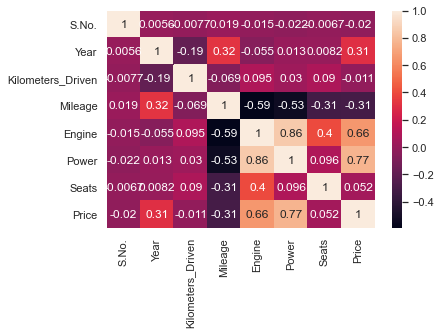

<IPython.core.display.Javascript object>

In [16]:
sns.heatmap(df.corr(), annot=True)

# Observations

####  Serial number  seems pretty much  out of the place  and we can drop this column further 
###   Seats , power has negative correlation but seats share a psotive correlation  with engine, mileage
###   Thats understood as high power vehicles have less mileage and typicallyy they are 2 seaters. 

# Action
### Drop S.No and copy to new data set use copy() function, not include  inplace = True

In [17]:
# remove the column and save to new data frame, see the info after thatg
df_1 = df.drop("S.No.", axis=1).copy()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


<IPython.core.display.Javascript object>

#                       Data Visualization 
##     Categorical plots => count plot 
### Action  Needed: 
####  apply on all categorical variables 

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

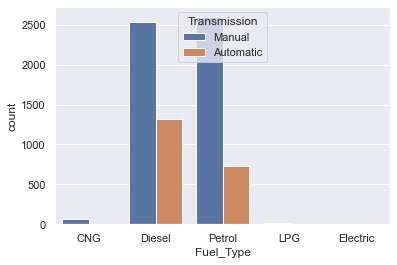

<IPython.core.display.Javascript object>

In [18]:
sns.countplot(x="Fuel_Type", hue="Transmission", data=df)

<AxesSubplot:xlabel='Owner_Type', ylabel='count'>

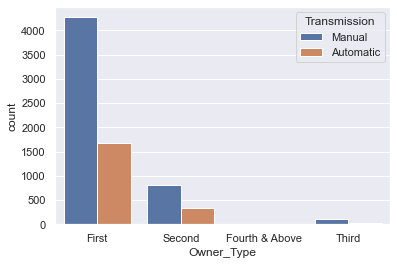

<IPython.core.display.Javascript object>

In [19]:
sns.countplot(x="Owner_Type", hue="Transmission", data=df)

# Observatons
## Automatic vehicles are new to market and are very popular,  but manual vehicles are not over thrown now
###  They are also popular choice in 2nd owner market, 2rd , 4th and beyond are vehicles that are mostly manual.
###  Both petrol and Diesel has  automatic and manual transmission tupes, for CNG, LPG and Electric we do not have such category
 
# Box Plot 

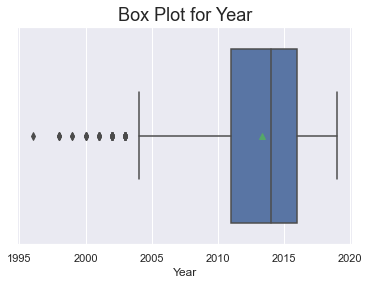

<IPython.core.display.Javascript object>

In [20]:
sns.boxplot(x=df["Year"], showmeans=True)
plt.title("Box Plot for Year", size=18)
plt.show()

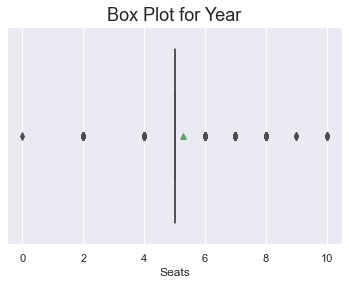

<IPython.core.display.Javascript object>

In [21]:
sns.boxplot(x=df["Seats"], showmeans=True)
plt.title("Box Plot for Year", size=18)
plt.show()

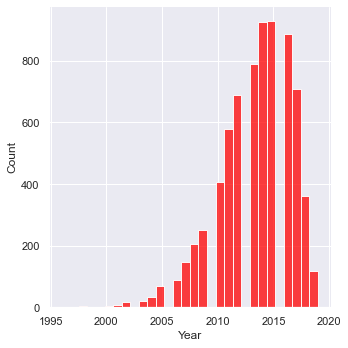

<IPython.core.display.Javascript object>

In [71]:
sns.displot(df['Year'], kde = False, color ='red', bins = 30)


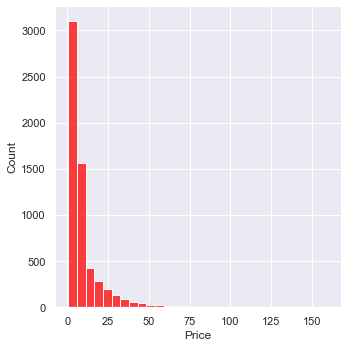

<IPython.core.display.Javascript object>

In [72]:
sns.displot(df['Price'], kde = False, color ='red', bins = 30)


# Multi Variant Chart and analysis below 

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

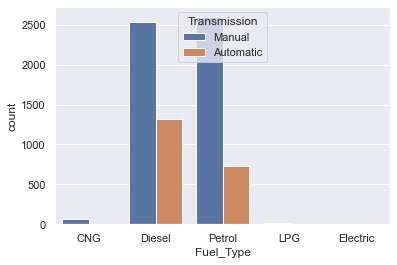

<IPython.core.display.Javascript object>

In [24]:
sns.countplot(x="Fuel_Type", hue="Transmission", data=df)

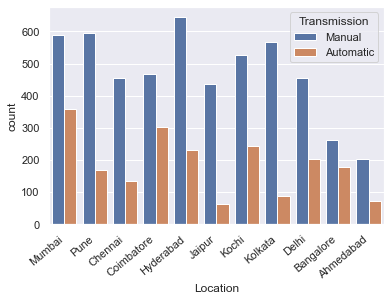

<Figure size 1440x1440 with 0 Axes>

<IPython.core.display.Javascript object>

In [25]:
ax = sns.countplot(x="Location", hue="Transmission", data=df)
plt.figure(figsize=(20, 20))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

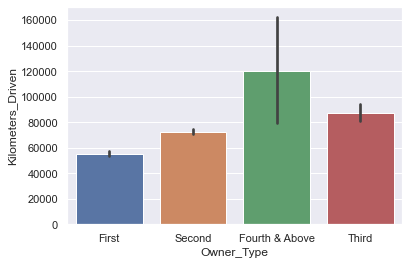

<IPython.core.display.Javascript object>

In [26]:
ax = sns.barplot(x="Owner_Type", y="Kilometers_Driven",  data=df)


### observations here show that when a buyer has his first car they does not seem to worry more on price or mileage
###  Most mileage giving vechicles are passed to 2nd, 4th owners as well.

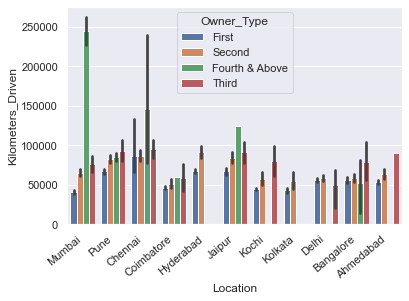

<Figure size 1440x1440 with 0 Axes>

<IPython.core.display.Javascript object>

In [27]:
ax = sns.barplot(x="Location", y="Kilometers_Driven", hue="Owner_Type", data=df)
plt.figure(figsize=(20, 20))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

###  this show interesting details about vehicles being driven the most with 3rd owner.
###  first and owners does not necessarily seem to use much of the new vechicle 

## this observation is huge trend in significant re-use of vechicles in cities of mumbai and chennai
## will move to catplot to do better visualization


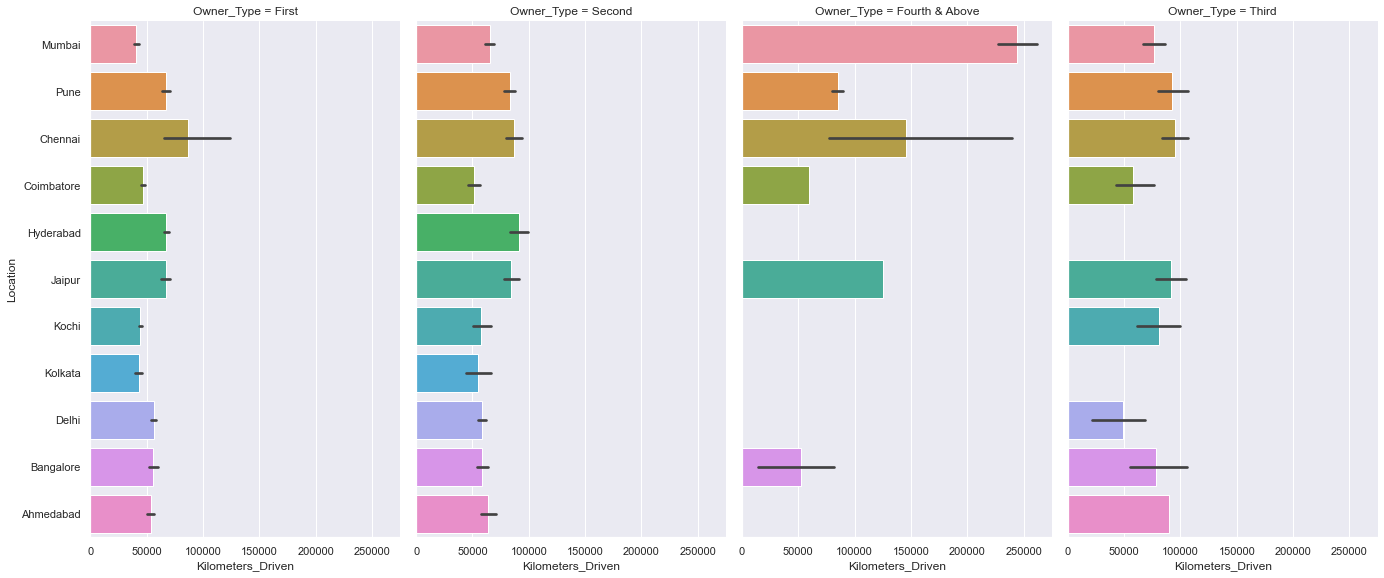

<IPython.core.display.Javascript object>

In [28]:
g = sns.catplot(
    x="Kilometers_Driven",
    y="Location",
    col="Owner_Type",
    data=df,
    kind="bar",
    height=8,
    aspect=0.6,
)

### cities  which have 4 and above vechle usage are having entry barrier to buy new ones.
###  the vechicle life time is more in those cities than compared to others.

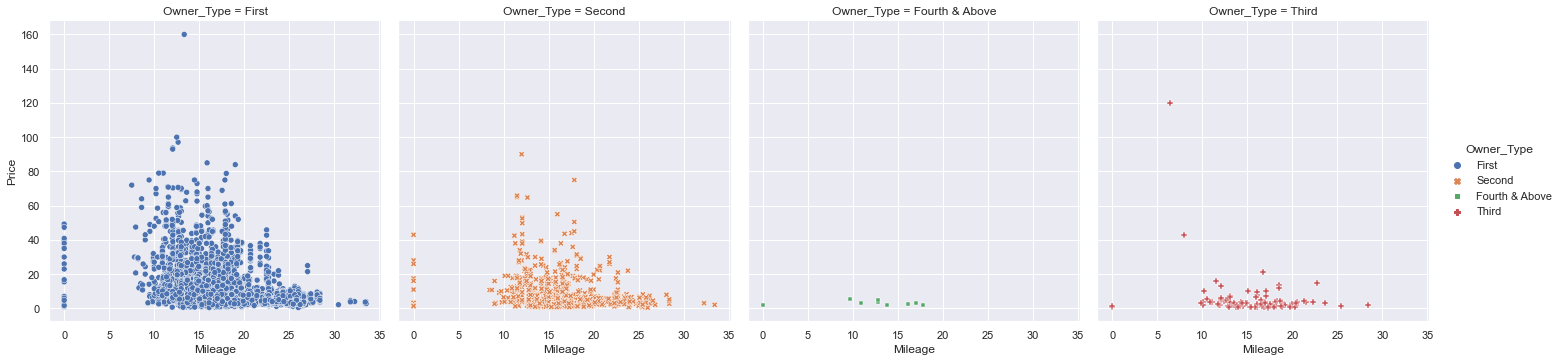

<IPython.core.display.Javascript object>

In [29]:
# sns.scatterplot(data=df, x="Mileage", y="Price", hue="Owner_Type")
sns.relplot(
    data=df,
    x="Mileage",
    y="Price",
    col="Owner_Type",
    hue="Owner_Type",
    style="Owner_Type",
    kind="scatter",
)

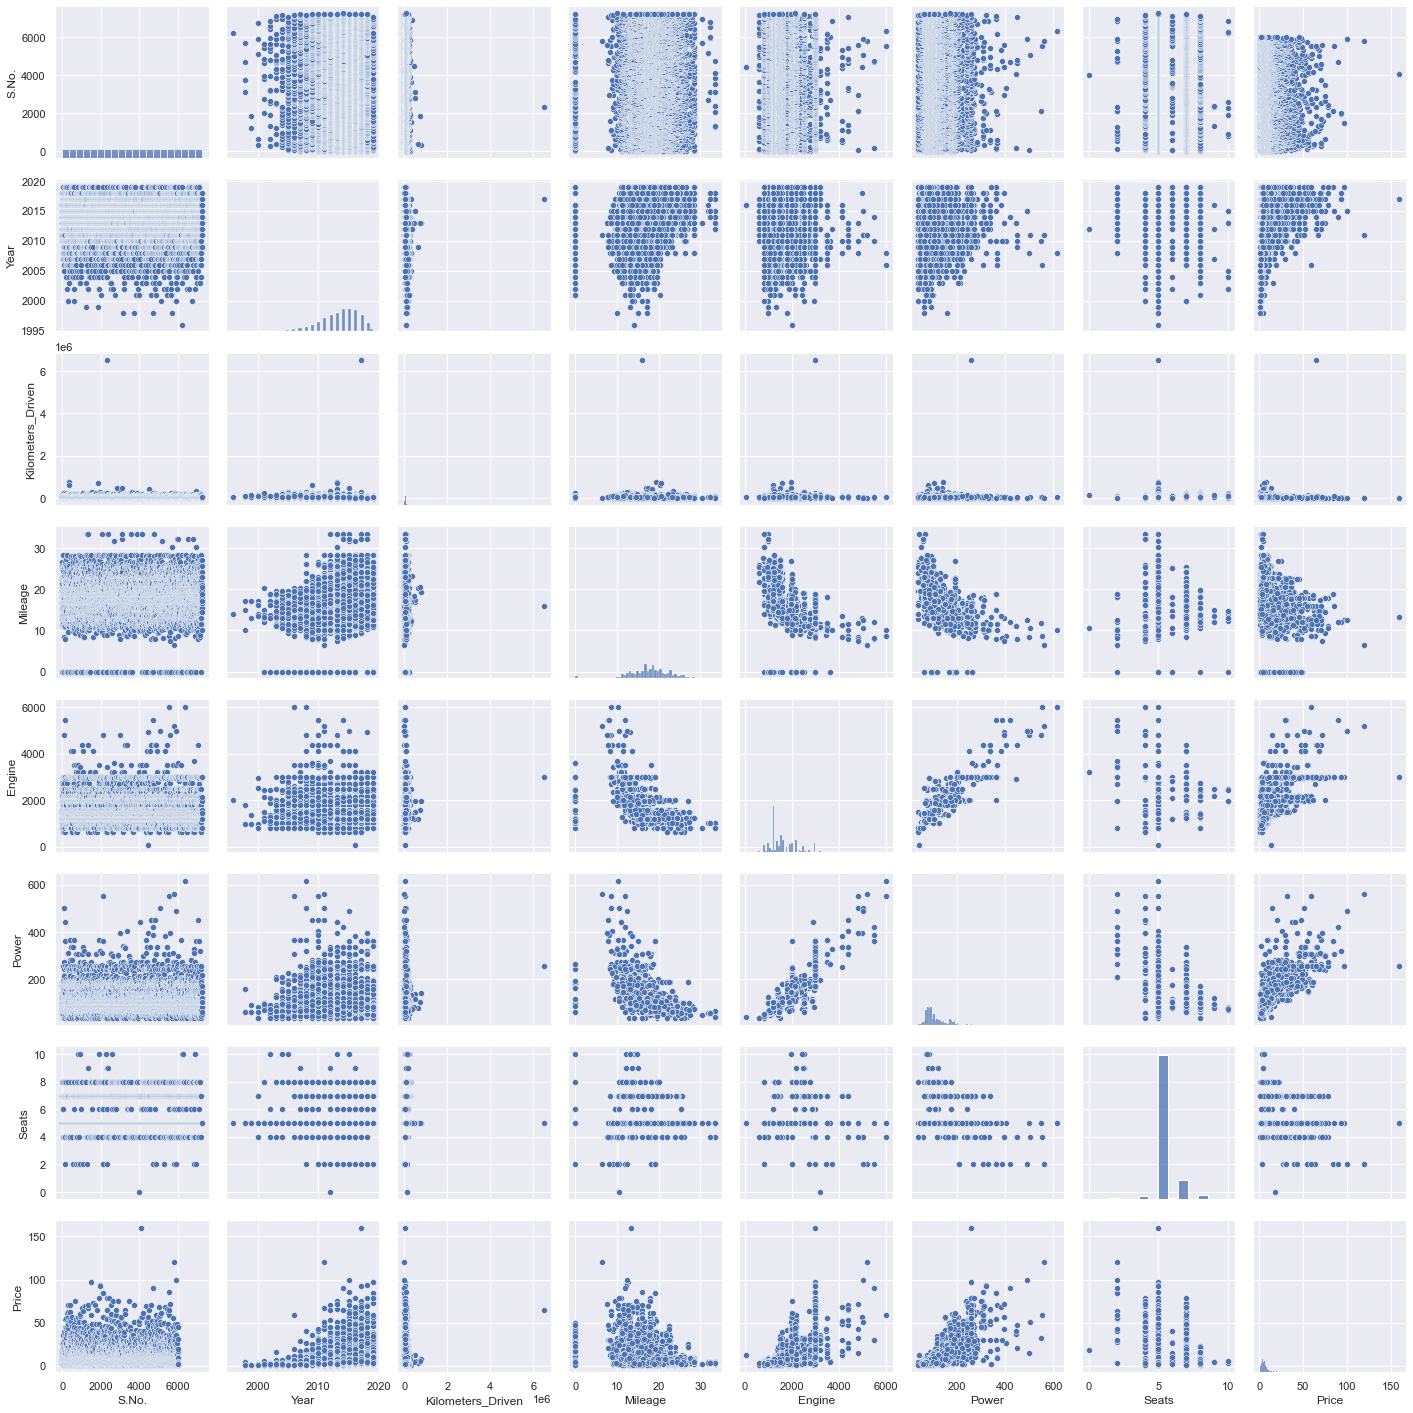

<IPython.core.display.Javascript object>

In [30]:
sns.pairplot(df)

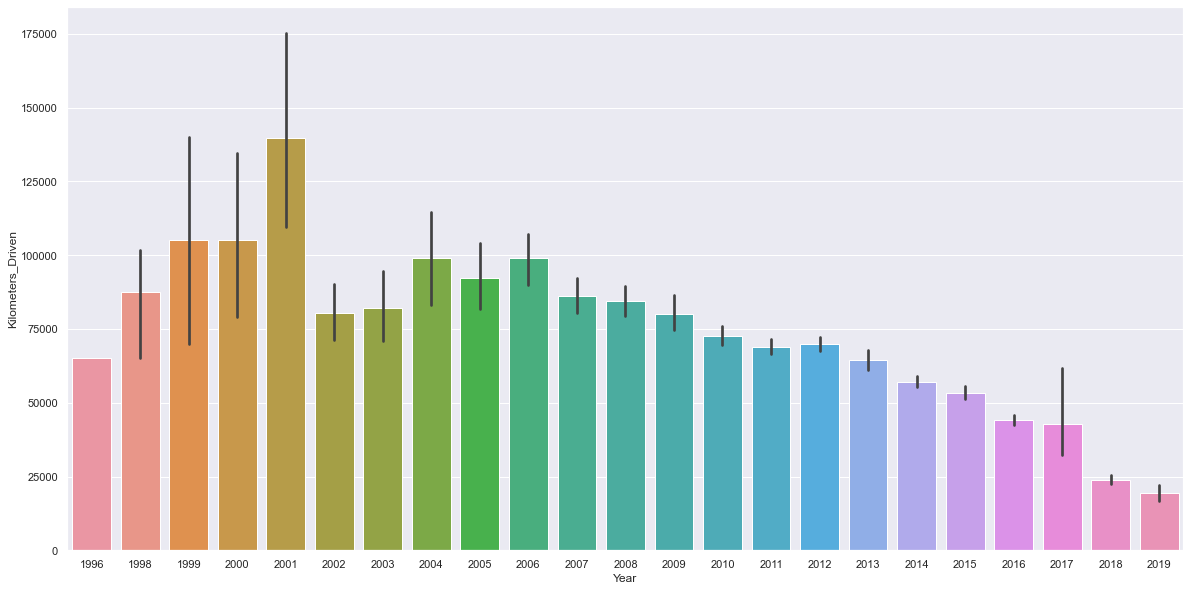

<IPython.core.display.Javascript object>

In [31]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Year", y="Kilometers_Driven", ax=ax, data=df)
plt.show()

/Users/pranabkb/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Seats'>

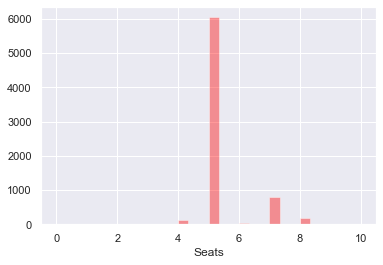

<IPython.core.display.Javascript object>

In [32]:
sns.distplot(df['Seats'], kde = False, color ='red', bins = 30)


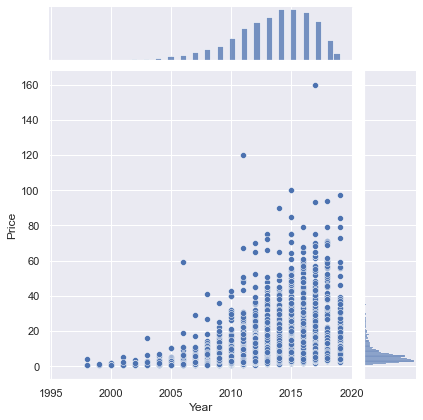

<IPython.core.display.Javascript object>

In [33]:
# Joint plots shows bivariate scatterplots
# And univariate histograms
sns.jointplot(x="Year", y="Price", data=df)

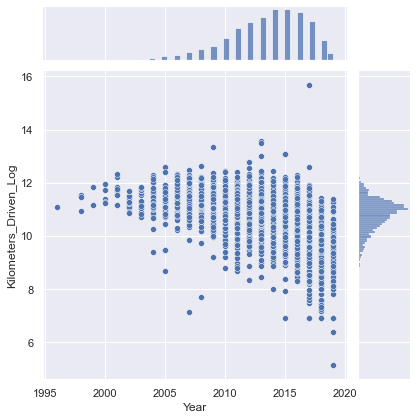

<IPython.core.display.Javascript object>

In [34]:
df["Kilometers_Driven_Log"] = np.log(df["Kilometers_Driven"])
sns.jointplot(x="Year", y="Kilometers_Driven_Log", data=df)

### lmplot() function in seaborn
### Seaborn’s lmplot is a 2D scatterplot with an optional overlaid regression line. Logistic regression for binary #### classification is also supported with lmplot . It is intended as a convenient interface to fit regression models ### across conditional subsets of a dataset

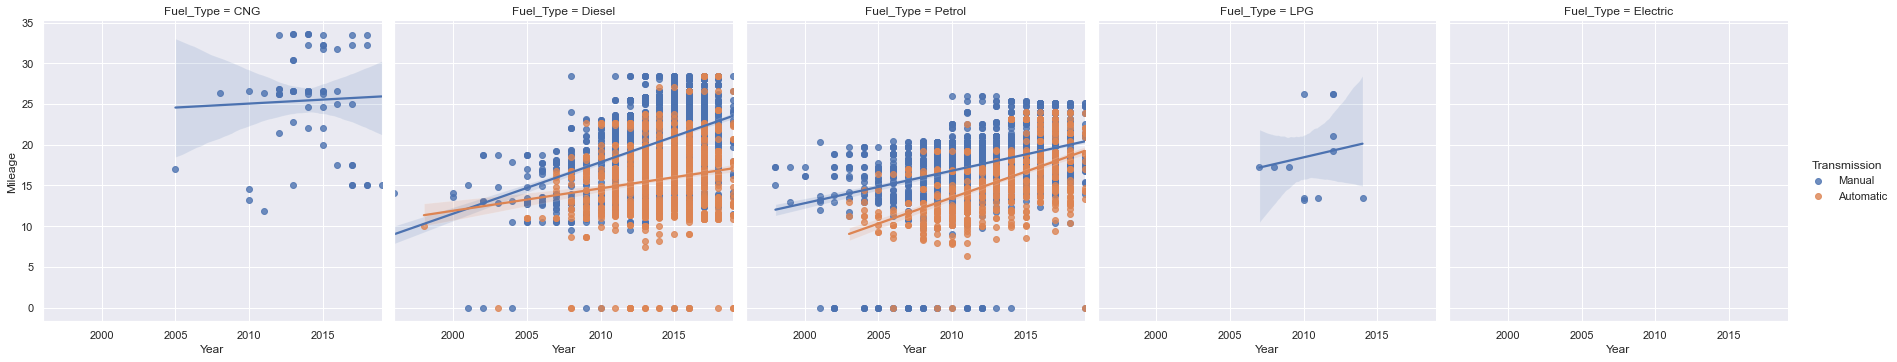

<IPython.core.display.Javascript object>

In [35]:
sns.lmplot(x="Year", y="Mileage", data=df, hue="Transmission", col="Fuel_Type")

# Box Plot => multi variant

<AxesSubplot:xlabel='Year', ylabel='Kilometers_Driven'>

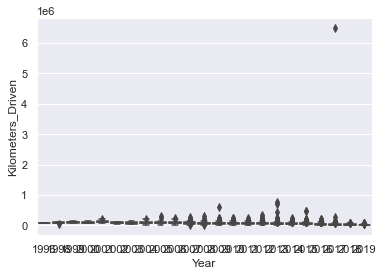

<IPython.core.display.Javascript object>

In [36]:
sns.boxplot(x="Year", y="Kilometers_Driven", data=df_1)

# Data Processing For Analysis / Normalization / Model Creation

     # Handle missing values, outliers, adding missing values.
     # Transformation for data processing
     # Feature Encoding 
     # Standardization or Data processing
     # Dimension Reduction (with PCA)
     # Model training
     # Testing Model

In [37]:
# function to do data analysis, which could give some insights into data frame
def dataAnalysis(df):
    print(df.shape)
    print(df.info())
    print(df.describe(include="all"))
    return "Initial Data Analysis form data  Transformatino"


dataAnalysis(df_1)

(7253, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB
None
                          Name Location         Year  Kilometers_Driven  \
count             

'Initial Data Analysis form data  Transformatino'

<IPython.core.display.Javascript object>

#  Again follow the pattern,  Drop the Duplicates 

In [38]:
df_1 = df_1.drop_duplicates()
print(df_1.shape)

(7252, 13)


<IPython.core.display.Javascript object>

# find out mean seats of honda and replace with it

# Handle Missing Values 
# Preparing data  for missing values

In [39]:
# from the above its clear that we have rows where power is null, so we can't judge price
# form them so we will remove those rows and see
df_1 = df_1[pd.notnull(df["Power"])]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7077 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7077 non-null   object 
 1   Location           7077 non-null   object 
 2   Year               7077 non-null   int64  
 3   Kilometers_Driven  7077 non-null   int64  
 4   Fuel_Type          7077 non-null   object 
 5   Transmission       7077 non-null   object 
 6   Owner_Type         7077 non-null   object 
 7   Mileage            7075 non-null   float64
 8   Engine             7077 non-null   float64
 9   Power              7077 non-null   float64
 10  Seats              7074 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              5876 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 774.0+ KB


<ipython-input-39-3da64e993964>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1 = df_1[pd.notnull(df["Power"])]


<IPython.core.display.Javascript object>

In [40]:
print(df[df.isnull().any(axis=1)].count())

S.No.                    6430
Name                     6430
Location                 6430
Year                     6430
Kilometers_Driven        6430
Fuel_Type                6430
Transmission             6430
Owner_Type               6430
Mileage                  6428
Engine                   6384
Power                    6255
Seats                    6377
New_Price                 183
Price                    5196
Kilometers_Driven_Log    6430
dtype: int64


<IPython.core.display.Javascript object>

In [41]:
# Create a new Data Frame and remove new price as its more of null values
df_1.drop("New_Price", inplace=True, axis=1)

<IPython.core.display.Javascript object>

# After removing the New_Price  null values we are now left with less data
##  This in turn lost more than more rows  and it does mean our data  collection effort needs 


In [42]:
# check if price is null for the csv, if we are predicting  price and the price is itself null
# we need to drop them, as it could have significant impact on our model and we do not need that data
df["Price"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7248     True
7249     True
7250     True
7251     True
7252     True
Name: Price, Length: 7253, dtype: bool

<IPython.core.display.Javascript object>

In [43]:
df.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_Price                6247
Price                    1234
Kilometers_Driven_Log       0
dtype: int64

<IPython.core.display.Javascript object>

# investigate ways in which we can massage or use replace missing values in 
    # Mileage
    # Engine
    # Power
    # Price

In [44]:
# look at the same columns to see if we can get any idea of how do we process missing vlues
df_1.sample(n=5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3979,Hyundai Grand i10 Asta,Kolkata,2015,15305,Petrol,Manual,First,18.90,1197.0,82.0,5.0,3.75
4226,Mahindra Scorpio VLX 2.2 mHawk Airbag BSIV,Delhi,2011,77001,Diesel,Manual,First,12.05,2179.0,120.0,8.0,4.49
5070,Hyundai i10 Magna AT,Kochi,2010,30566,Petrol,Automatic,First,19.20,1197.0,80.0,5.0,3.32
5538,Toyota Fortuner 3.0 Diesel,Bangalore,2013,100000,Diesel,Manual,Second,11.50,2982.0,171.0,7.0,17.75
2321,Volkswagen Vento 1.6 Highline,Mumbai,2014,46000,Petrol,Manual,First,15.04,1598.0,103.2,5.0,4.45


<IPython.core.display.Javascript object>

# Decission Making
    ##   Looking at the name of the car, we see brands are embedded in them.
    ##   We could use that data to massage missing values * 

In [45]:
# convert all names and extract brands for each car model
# example Hyundai Santro Xing XO => first substring has brand name


df_1["Brand"] = df_1["Name"].apply(lambda x: x.split(" ")[0].strip().upper())
df_1["Brand"]

0              MARUTI
1             HYUNDAI
2               HONDA
3              MARUTI
4                AUDI
            ...      
7248       VOLKSWAGEN
7249       VOLKSWAGEN
7250           NISSAN
7251       VOLKSWAGEN
7252    MERCEDES-BENZ
Name: Brand, Length: 7077, dtype: object

<IPython.core.display.Javascript object>

#  Get mean of columns like  mileage, seats and power

In [46]:
print(df_1.groupby(['Brand'],as_index=False).Mileage.mean())
print(df_1.groupby(['Brand'],as_index=False).Power.mean())
print(df_1.groupby(['Brand'],as_index=False).Seats.mean())
print(df_1.groupby(['Brand'],as_index=False).Price.mean())


            Brand    Mileage
0      AMBASSADOR  12.800000
1            AUDI  15.377254
2         BENTLEY   9.400000
3             BMW  16.941508
4       CHEVROLET  18.330600
5          DATSUN  21.345294
6            FIAT  18.128125
7           FORCE  17.000000
8            FORD  18.534140
9           HONDA  18.560544
10        HYUNDAI  19.142336
11          ISUZU  12.616000
12         JAGUAR  14.889375
13           JEEP  16.731579
14    LAMBORGHINI   6.400000
15           LAND  11.427656
16       MAHINDRA  15.310767
17         MARUTI  21.636325
18  MERCEDES-BENZ  13.927725
19           MINI  18.581935
20     MITSUBISHI  12.291667
21         NISSAN  19.496460
22      OPELCORSA  14.200000
23        PORSCHE  14.142941
24        RENAULT  20.727471
25          SKODA  16.891200
26           TATA  20.062009
27         TOYOTA  14.134075
28     VOLKSWAGEN  18.337346
29          VOLVO  15.030714
            Brand       Power
0      AMBASSADOR   35.500000
1            AUDI  189.340246
2         B

<IPython.core.display.Javascript object>

# update missing fileds for each brand by mean value 
# use the data frame for our analysis

In [47]:
#trying to print some rows with missng values before changes

#print(df[df.Name == "Ford Fiesta 1.4 SXi TDCi"])
#print(df[df.Name == "Hyundai Santro Xing XL"])
#print(df[df.Name == "Hyundai Santro Xing XO"])
#print(df[df.Name == "Hyundai Santro Xing XL eRLX Euro III"])
#print( df[df.Name == "Hyundai Santro Xing XO eRLX Euro II"])

print( df[df.Name == "Mahindra E Verito D4"])
print( df[df.Name == "Ford Figo Diesel"])
print( df[df.Name == "Toyota Prius 2009-2016 Z4"])
print( df[df.Name == "Honda City 1.5 EXI"])



      S.No.                  Name Location  Year  Kilometers_Driven Fuel_Type  \
4446   4446  Mahindra E Verito D4  Chennai  2016              50000  Electric   

     Transmission Owner_Type  Mileage  Engine  Power  Seats   New_Price  \
4446    Automatic      First      NaN    72.0   41.0    5.0  13.58 Lakh   

      Price  Kilometers_Driven_Log  
4446   13.0              10.819778  
     S.No.              Name   Location  Year  Kilometers_Driven Fuel_Type  \
229    229  Ford Figo Diesel  Bangalore  2015              70436    Diesel   

    Transmission Owner_Type  Mileage  Engine  Power  Seats New_Price  Price  \
229       Manual      First      0.0  1498.0   99.0    NaN       NaN    3.6   

     Kilometers_Driven_Log  
229               11.16246  
      S.No.                       Name Location  Year  Kilometers_Driven  \
4904   4904  Toyota Prius 2009-2016 Z4   Mumbai  2011              44000   

     Fuel_Type Transmission Owner_Type  Mileage  Engine  Power  Seats  \
4904  Electr

<IPython.core.display.Javascript object>

In [48]:
BrandList = df_1["Brand"].unique().tolist()
dataMassageList = ["Mileage", "Engine", "Power", "Price"]
# print( BrandList)
# print(dataMassageList)

         
    
def dataMassageFunction(dataframe, columnList, dataMassageList):
    for i, brand in enumerate(columnList):
        for j, columnMassaged in enumerate(dataMassageList):

            # print(localMean)
            print("brand =", brand)
            print("columnMassaged", columnMassaged)
            localmediandf = dataframe.loc[dataframe['Brand'] == brand]
            
            print(dataframe.loc[dataframe['Brand'] == brand])
            #print(df.loc[dataframe['Brand'].isin(brand)])
            localmedian = localmediandf[columnMassaged].median()
            dataframe.loc[dataframe[columnMassaged].isnull()] = localmedian
            print(localmedian)
        print("0")


dataMassageFunction(df_1, BrandList, dataMassageList)


brand = MARUTI
columnMassaged Mileage
                                   Name Location  Year  Kilometers_Driven  \
0                Maruti Wagon R LXI CNG   Mumbai  2010              72000   
3                     Maruti Ertiga VDI  Chennai  2012              87000   
10                     Maruti Ciaz Zeta    Kochi  2018              25692   
12                Maruti Swift VDI BSIV   Jaipur  2015              64424   
17                Maruti Swift DDiS VDI   Jaipur  2017              25000   
...                                 ...      ...   ...                ...   
7210    Maruti Vitara Brezza VDi Option   Jaipur  2017              19000   
7218  Maruti Vitara Brezza ZDi Plus AMT   Mumbai  2018               3800   
7220               Maruti Dzire AMT VDI    Delhi  2017              14300   
7222              Maruti Celerio VXI AT  Chennai  2015              31717   
7235           Maruti Vitara Brezza ZDi    Kochi  2017              21380   

     Fuel_Type Transmission Owner_Typ

82.0
brand = HYUNDAI
columnMassaged Price
                                  Name    Location    Year  Kilometers_Driven  \
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015.0            41000.0   
5      Hyundai EON LPG Era Plus Option   Hyderabad  2012.0            75000.0   
23               Hyundai i20 1.2 Magna     Kolkata  2010.0            45807.0   
43      Hyundai i20 Magna Optional 1.2       Kochi  2014.0            35487.0   
44    Hyundai Elantra 2.0 SX Option AT   Bangalore  2014.0            46374.0   
...                                ...         ...     ...                ...   
5986                  Hyundai Getz GLS      Jaipur  2005.0           100000.0   
5993                Hyundai Elantra SX      Mumbai  2014.0            55619.0   
6000            Hyundai i20 Sportz 1.2   Bangalore  2014.0            68010.0   
6004                  Hyundai Getz GLE  Coimbatore  2007.0            66800.0   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015.0         

[601 rows x 13 columns]
4.95
0
brand = AUDI
columnMassaged Mileage
                                      Name    Location    Year  \
4          Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013.0   
22    Audi A6 2011-2015 35 TFSI Technology      Mumbai  2015.0   
33                         Audi A6 2.7 TDI     Kolkata  2010.0   
50    Audi A4 2.0 TDI 177 Bhp Premium Plus       Kochi  2015.0   
65             Audi A4 2.0 TDI Multitronic      Jaipur  2012.0   
...                                    ...         ...     ...   
5877   Audi A4 2.0 TDI Celebration Edition       Delhi  2011.0   
5927    Audi Q5 3.0 TDI Quattro Technology  Coimbatore  2018.0   
5950                       Audi Q3 2.0 TDI   Bangalore  2014.0   
5989           Audi A4 35 TDI Premium Plus  Coimbatore  2013.0   
6001             Audi A6 2011-2015 2.0 TDI       Kochi  2013.0   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
4               40670.0    Diesel    Automatic     Second    1

5908  147.60    5.0   8.00  NISSAN  
84.8
brand = NISSAN
columnMassaged Price
                                                   Name    Location    Year  \
6                                Nissan Micra Diesel XV      Jaipur  2013.0   
26                               Nissan Micra Diesel XV   Hyderabad  2012.0   
58                                Nissan X-Trail SLX AT   Hyderabad  2010.0   
73                              Nissan Terrano XV D Pre       Kochi  2015.0   
117                                 Nissan Micra XV CVT  Coimbatore  2016.0   
226   Nissan Terrano XV Premium 110 PS Anniversary E...  Coimbatore  2015.0   
361                              Nissan Micra Diesel XV     Chennai  2011.0   
370                                     Nissan Teana XV      Mumbai  2015.0   
486                      Nissan Micra Diesel XV Premium        Pune  2013.0   
606                             Nissan Terrano XL 85 PS   Hyderabad  2014.0   
671                                 Nissan Sunny XV C

5908  147.60    5.0   8.00  NISSAN  
4.5
0
brand = TOYOTA
columnMassaged Mileage
                                        Name    Location    Year  \
7          Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016.0   
29       Toyota Innova 2.5 V Diesel 7-seater      Mumbai  2007.0   
31                    Toyota Corolla Altis G       Delhi  2012.0   
45                 Toyota Corolla Altis G AT      Mumbai  2016.0   
47            Toyota Innova Crysta 2.7 GX MT   Bangalore  2012.0   
...                                      ...         ...     ...   
5956  Toyota Innova 2.5 GX (Diesel) 7 Seater     Chennai  2012.0   
5959          Toyota Corolla Altis 1.8 G CVT       Delhi  2010.0   
5969     Toyota Innova 2.5 V Diesel 8-seater       Delhi  2010.0   
6009                     Toyota Camry Hybrid      Mumbai  2015.0   
6012     Toyota Innova 2.5 V Diesel 7-seater  Coimbatore  2011.0   

      Kilometers_Driven Fuel_Type Transmission      Owner_Type  Mileage  \
7               36000.0    

                                            Name    Location    Year  \
8            Volkswagen Vento Diesel Comfortline        Pune  2013.0   
24           Volkswagen Vento Petrol Highline AT     Kolkata  2010.0   
34                 Volkswagen Vento 1.6 Highline  Coimbatore  2014.0   
39         Volkswagen Polo Diesel Trendline 1.2L     Chennai  2013.0   
55    Volkswagen Vento 2013-2015 1.6 Comfortline     Kolkata  2015.0   
...                                          ...         ...     ...   
5971            Volkswagen Polo 1.5 TDI Highline   Hyderabad  2013.0   
5974            Volkswagen Ameo 1.2 MPI Highline   Ahmedabad  2016.0   
5983     Volkswagen Polo Petrol Comfortline 1.2L     Kolkata  2011.0   
5998  Volkswagen Polo IPL II 1.2 Petrol Highline        Pune  2010.0   
6002               Volkswagen Vento 1.6 Highline      Mumbai  2011.0   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
8               64430.0    Diesel       Manual      First

5999   88.70    5.0   4.00  TATA  
1248.0
brand = TATA
columnMassaged Power
                                           Name    Location    Year  \
9                Tata Indica Vista Quadrajet LS     Chennai  2012.0   
41                              Tata Nano LX SE       Kochi  2014.0   
64                           Tata Indica V2 eLS     Chennai  2016.0   
81                   Tata Zest Revotron 1.2T XE        Pune  2017.0   
112                          Tata Nano Twist XT   Bangalore  2014.0   
124                               Tata Nano XTA  Coimbatore  2017.0   
204                         Tata Indigo eCS GLX        Pune  2010.0   
230                     Tata Indica V2 DLS BSII      Jaipur  2007.0   
277             Tata Zest Quadrajet 1.3 75PS XE        Pune  2017.0   
290             Tata Zest Quadrajet 1.3 75PS XE        Pune  2018.0   
304                              Tata Indigo LX  Coimbatore  2013.0   
315                             Tata Sumo Delux   Hyderabad  2000.0   
3

74.0
brand = TATA
columnMassaged Price
                                           Name    Location    Year  \
9                Tata Indica Vista Quadrajet LS     Chennai  2012.0   
41                              Tata Nano LX SE       Kochi  2014.0   
64                           Tata Indica V2 eLS     Chennai  2016.0   
81                   Tata Zest Revotron 1.2T XE        Pune  2017.0   
112                          Tata Nano Twist XT   Bangalore  2014.0   
124                               Tata Nano XTA  Coimbatore  2017.0   
204                         Tata Indigo eCS GLX        Pune  2010.0   
230                     Tata Indica V2 DLS BSII      Jaipur  2007.0   
277             Tata Zest Quadrajet 1.3 75PS XE        Pune  2017.0   
290             Tata Zest Quadrajet 1.3 75PS XE        Pune  2018.0   
304                              Tata Indigo LX  Coimbatore  2013.0   
315                             Tata Sumo Delux   Hyderabad  2000.0   
316        Tata Indica Vista Aura 1.3 

5999   88.70    5.0   4.00  TATA  
2.9
0
brand = LAND
columnMassaged Mileage
                                                   Name    Location    Year  \
13                     Land Rover Range Rover 2.2L Pure       Delhi  2014.0   
14                       Land Rover Freelander 2 TD4 SE        Pune  2012.0   
191                 Land Rover Range Rover 2.2L Dynamic  Coimbatore  2018.0   
311                  Land Rover Range Rover HSE Dynamic       Delhi  2017.0   
399                 Land Rover Range Rover 2.2L Dynamic   Hyderabad  2012.0   
404                Land Rover Range Rover 2.2L Prestige  Coimbatore  2017.0   
410                    Land Rover Range Rover 2.2L Pure  Coimbatore  2014.0   
480          Land Rover Range Rover Evoque 2.0 TD4 Pure       Delhi  2015.0   
521                  Land Rover Range Rover HSE Dynamic  Coimbatore  2017.0   
701                          Land Rover Freelander 2 SE     Chennai  2011.0   
941   Land Rover Range Rover Evoque 2.0 TD4 HSE Dynami

5879  175.56    7.0  11.85  MITSUBISHI  
2477.0
brand = MITSUBISHI
columnMassaged Power
                                                  Name    Location    Year  \
15                         Mitsubishi Pajero Sport 4X4       Delhi  2014.0   
401   Mitsubishi Pajero Sport 4X2 AT DualTone BlackTop   Hyderabad  2018.0   
453                            Mitsubishi Cedia Sports     Chennai  2010.0   
597           Mitsubishi Pajero 2.8 SFX BSIV Dual Tone      Mumbai  2008.0   
924                           Mitsubishi Outlander 2.4       Delhi  2010.0   
946                        Mitsubishi Pajero Sport 4X4   Bangalore  2013.0   
1200                       Mitsubishi Pajero Sport 4X4      Mumbai  2013.0   
1909         Mitsubishi Pajero 2.8 SFX BSIII Dual Tone       Kochi  2013.0   
2560                  Mitsubishi Pajero 2.8 GLX Sports   Hyderabad  2008.0   
2588                        Mitsubishi Montero 3.2 GLS     Chennai  2007.0   
2793                         Mitsubishi Pajero 2.8 SFX

9.95
0
brand = RENAULT
columnMassaged Mileage
                                                   Name    Location    Year  \
18                  Renault Duster 85PS Diesel RxL Plus       Kochi  2014.0   
30                 Renault Duster 110PS Diesel RxZ Pack   Bangalore  2013.0   
56                                     Renault KWID RXT       Kochi  2017.0   
185                    Renault Lodgy 110PS RxZ 8 Seater      Mumbai  2015.0   
199                      Renault Duster 85PS Diesel RxL       Delhi  2014.0   
212             Renault Duster 85PS Diesel RxL Optional      Mumbai  2014.0   
269              Renault Duster 110PS Diesel RXZ Option       Delhi  2016.0   
376                      Renault Duster 85PS Diesel RxL     Chennai  2015.0   
434                       Renault Captur 1.5 Diesel RXL  Coimbatore  2019.0   
461                     Renault Duster 110PS Diesel RxL   Hyderabad  2012.0   
479               Renault Duster 85PS Diesel RxL Option      Mumbai  2015.0   
515   

5995   83.80    5.0   7.75  RENAULT  
19.87
brand = RENAULT
columnMassaged Engine
                                                   Name    Location    Year  \
18                  Renault Duster 85PS Diesel RxL Plus       Kochi  2014.0   
30                 Renault Duster 110PS Diesel RxZ Pack   Bangalore  2013.0   
56                                     Renault KWID RXT       Kochi  2017.0   
185                    Renault Lodgy 110PS RxZ 8 Seater      Mumbai  2015.0   
199                      Renault Duster 85PS Diesel RxL       Delhi  2014.0   
212             Renault Duster 85PS Diesel RxL Optional      Mumbai  2014.0   
269              Renault Duster 110PS Diesel RXZ Option       Delhi  2016.0   
376                      Renault Duster 85PS Diesel RxL     Chennai  2015.0   
434                       Renault Captur 1.5 Diesel RXL  Coimbatore  2019.0   
461                     Renault Duster 110PS Diesel RxL   Hyderabad  2012.0   
479               Renault Duster 85PS Diesel RxL 

5995   83.80    5.0   7.75  RENAULT  
1461.0
brand = RENAULT
columnMassaged Power
                                                   Name    Location    Year  \
18                  Renault Duster 85PS Diesel RxL Plus       Kochi  2014.0   
30                 Renault Duster 110PS Diesel RxZ Pack   Bangalore  2013.0   
56                                     Renault KWID RXT       Kochi  2017.0   
185                    Renault Lodgy 110PS RxZ 8 Seater      Mumbai  2015.0   
199                      Renault Duster 85PS Diesel RxL       Delhi  2014.0   
212             Renault Duster 85PS Diesel RxL Optional      Mumbai  2014.0   
269              Renault Duster 110PS Diesel RXZ Option       Delhi  2016.0   
376                      Renault Duster 85PS Diesel RxL     Chennai  2015.0   
434                       Renault Captur 1.5 Diesel RXL  Coimbatore  2019.0   
461                     Renault Duster 110PS Diesel RxL   Hyderabad  2012.0   
479               Renault Duster 85PS Diesel RxL 

                                                  Name    Location    Year  \
19    Mercedes-Benz New C-Class C 220 CDI BE Avantgare   Bangalore  2014.0   
38                    Mercedes-Benz M-Class ML 350 CDI        Pune  2013.0   
62      Mercedes-Benz New C-Class C 200 CGI Avantgarde       Delhi  2015.0   
63           Mercedes-Benz New C-Class 200 CDI Classic        Pune  2011.0   
67            Mercedes-Benz C-Class Progressive C 220d  Coimbatore  2019.0   
...                                                ...         ...     ...   
5963        Mercedes-Benz New C-Class C 200 AVANTGARDE      Mumbai  2013.0   
5965      Mercedes-Benz New C-Class C 250 CDI Elegance   Hyderabad  2012.0   
5970                 Mercedes-Benz GLA Class 200 Sport       Kochi  2018.0   
5984      Mercedes-Benz New C-Class C 200 CGI Elegance      Mumbai  2012.0   
6006                  Mercedes-Benz M-Class ML 320 CDI      Mumbai  2009.0   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mile

                                     Name    Location    Year  \
20                      BMW 3 Series 320d       Kochi  2014.0   
86            BMW 5 Series 2003-2012 525d       Delhi  2011.0   
113         BMW 3 Series 320d Luxury Line      Mumbai  2015.0   
118           BMW 5 Series 2010-2013 525i      Mumbai  2009.0   
137                BMW 1 Series 118d Base  Coimbatore  2015.0   
...                                   ...         ...     ...   
5751           BMW 3 Series 320d Prestige   Hyderabad  2015.0   
5775              BMW 6 Series Gran Coupe      Mumbai  2013.0   
5845              BMW 5 Series 525d Sedan      Mumbai  2013.0   
5868        BMW 3 Series 330d Convertible       Kochi  2014.0   
5946  BMW 5 Series 2013-2017 530d M Sport   Bangalore  2016.0   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
20              32982.0    Diesel    Automatic      First    22.69  1995.0   
86              75000.0    Diesel    Automatic     Second    16

[295 rows x 13 columns]
89.84
brand = FORD
columnMassaged Price
                                            Name   Location    Year  \
61                     Ford Figo Diesel Titanium  Bangalore  2010.0   
83                          Ford Figo Diesel ZXI  Hyderabad  2012.0   
93    Ford Ecosport 1.5 DV5 MT Titanium Optional      Delhi  2013.0   
164            Ford Ecosport 1.5 DV5 MT Ambiente      Kochi  2014.0   
167                    Ford Figo Diesel Titanium     Jaipur  2010.0   
...                                          ...        ...     ...   
5934           Ford Ecosport 1.5 DV5 MT Titanium    Kolkata  2014.0   
5938     Ford Figo Aspire 1.5 TDCi Titanium Plus      Kochi  2016.0   
5942                  Ford Endeavour 2.5L 4X2 MT     Jaipur  2011.0   
5944    Ford EcoSport 1.0 Ecoboost Titanium Plus      Delhi  2015.0   
5953                        Ford Figo Diesel EXI     Jaipur  2012.0   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
61   

6008  300.0    4.0  45.00  PORSCHE  
49.36
0
brand = DATSUN
columnMassaged Mileage
                         Name    Location    Year  Kilometers_Driven  \
102   Datsun GO Plus T Petrol        Pune  2017.0            32851.0   
157             Datsun GO NXT     Kolkata  2016.0             6000.0   
897   Datsun redi-GO T Option   Bangalore  2016.0            20487.0   
1757       Datsun GO T Option   Hyderabad  2016.0            19000.0   
2558  Datsun redi-GO T Option       Kochi  2018.0            30953.0   
3547         Datsun GO Plus T     Kolkata  2016.0            12800.0   
4125         Datsun redi-GO S     Chennai  2016.0            26239.0   
4169  Datsun redi-GO T Option       Kochi  2018.0             6279.0   
4265  Datsun redi-GO T Option  Coimbatore  2017.0            27509.0   
4314            Datsun GO NXT     Kolkata  2016.0             6000.0   
4430     Datsun Redi GO Sport   Bangalore  2017.0            12000.0   
4819         Datsun redi-GO T     Kolkata  2016.0    

5762  VOLVO  
13.5
brand = VOLVO
columnMassaged Engine
                                Name    Location    Year  Kilometers_Driven  \
116       Volvo V40 Cross Country D3   Bangalore  2014.0            32700.0   
415           Volvo S80 2006-2013 D5     Chennai  2010.0            92098.0   
437                     Volvo V40 D3   Bangalore  2015.0            33000.0   
989                    Volvo XC60 D5        Pune  2011.0           106976.0   
1178       Volvo XC60 D5 Inscription       Kochi  2014.0            86925.0   
1192           Volvo S60 D4 Momentum   Hyderabad  2015.0            51000.0   
1511      Volvo V40 Cross Country D3        Pune  2013.0            92000.0   
2193             Volvo S60 D4 SUMMUM  Coimbatore  2016.0            42259.0   
2401     Volvo XC90 2007-2015 D5 AWD       Kochi  2014.0            89230.0   
2561                    Volvo S80 D5   Hyderabad  2008.0            79000.0   
2689                    Volvo S60 D3     Chennai  2012.0            20000.0 

6018   57.60    5.0   2.50  CHEVROLET  
18.2
brand = CHEVROLET
columnMassaged Engine
                                       Name    Location    Year  \
145                Chevrolet Beat LT Option        Pune  2014.0   
179                Chevrolet Beat Diesel LT      Jaipur  2012.0   
183       Chevrolet Optra Magnum 1.6 LS BS3      Jaipur  2007.0   
231                       Chevrolet Beat LT       Kochi  2016.0   
240                Chevrolet Beat Diesel LT      Mumbai  2013.0   
354                  Chevrolet Spark 1.0 LS     Kolkata  2011.0   
441                Chevrolet Enjoy 1.4 LS 8     Kolkata  2014.0   
502                       Chevrolet Beat LS       Kochi  2012.0   
522                       Chevrolet Beat LT        Pune  2014.0   
543       Chevrolet Enjoy TCDi LTZ 7 Seater   Bangalore  2013.0   
581         Chevrolet Sail Hatchback 1.2 LS     Kolkata  2014.0   
612              Chevrolet Aveo U-VA 1.2 LT  Coimbatore  2010.0   
646              Chevrolet Beat Option Pack 

1199.0
brand = CHEVROLET
columnMassaged Power
                                       Name    Location    Year  \
145                Chevrolet Beat LT Option        Pune  2014.0   
179                Chevrolet Beat Diesel LT      Jaipur  2012.0   
183       Chevrolet Optra Magnum 1.6 LS BS3      Jaipur  2007.0   
231                       Chevrolet Beat LT       Kochi  2016.0   
240                Chevrolet Beat Diesel LT      Mumbai  2013.0   
354                  Chevrolet Spark 1.0 LS     Kolkata  2011.0   
441                Chevrolet Enjoy 1.4 LS 8     Kolkata  2014.0   
502                       Chevrolet Beat LS       Kochi  2012.0   
522                       Chevrolet Beat LT        Pune  2014.0   
543       Chevrolet Enjoy TCDi LTZ 7 Seater   Bangalore  2013.0   
581         Chevrolet Sail Hatchback 1.2 LS     Kolkata  2014.0   
612              Chevrolet Aveo U-VA 1.2 LT  Coimbatore  2010.0   
646              Chevrolet Beat Option Pack     Kolkata  2010.0   
699             

6011  262.60    5.0   4.75  SKODA  
17.2
brand = SKODA
columnMassaged Engine
                                                   Name    Location    Year  \
146                        Skoda Rapid 1.5 TDI Elegance     Chennai  2013.0   
153   Skoda Rapid 1.5 TDI AT Elegance Plus Black Pac...  Coimbatore  2016.0   
154                 Skoda Superb Elegance 2.0 TDI CR AT        Pune  2012.0   
180                    Skoda Superb Elegance 1.8 TSI AT       Kochi  2012.0   
198                                Skoda Laura Ambiente   Hyderabad  2008.0   
203                        Skoda Fabia 1.4 MPI Ambiente      Jaipur  2009.0   
206                   Skoda Octavia Elegance 1.8 TSI AT      Mumbai  2014.0   
218          Skoda Rapid 1.6 MPI AT Style Black Package      Mumbai  2017.0   
219                       Skoda Superb Style 1.8 TSI AT   Hyderabad  2017.0   
250                      Skoda Rapid Leisure 1.6 TDI MT     Kolkata  2012.0   
283                     Skoda Laura 1.9 TDI AT Ambient

6011  262.60    5.0   4.75  SKODA  
1798.0
brand = SKODA
columnMassaged Power
                                                   Name    Location    Year  \
146                        Skoda Rapid 1.5 TDI Elegance     Chennai  2013.0   
153   Skoda Rapid 1.5 TDI AT Elegance Plus Black Pac...  Coimbatore  2016.0   
154                 Skoda Superb Elegance 2.0 TDI CR AT        Pune  2012.0   
180                    Skoda Superb Elegance 1.8 TSI AT       Kochi  2012.0   
198                                Skoda Laura Ambiente   Hyderabad  2008.0   
203                        Skoda Fabia 1.4 MPI Ambiente      Jaipur  2009.0   
206                   Skoda Octavia Elegance 1.8 TSI AT      Mumbai  2014.0   
218          Skoda Rapid 1.6 MPI AT Style Black Package      Mumbai  2017.0   
219                       Skoda Superb Style 1.8 TSI AT   Hyderabad  2017.0   
250                      Skoda Rapid Leisure 1.6 TDI MT     Kolkata  2012.0   
283                     Skoda Laura 1.9 TDI AT Ambien

6011  262.60    5.0   4.75  SKODA  
108.5
brand = SKODA
columnMassaged Price
                                                   Name    Location    Year  \
146                        Skoda Rapid 1.5 TDI Elegance     Chennai  2013.0   
153   Skoda Rapid 1.5 TDI AT Elegance Plus Black Pac...  Coimbatore  2016.0   
154                 Skoda Superb Elegance 2.0 TDI CR AT        Pune  2012.0   
180                    Skoda Superb Elegance 1.8 TSI AT       Kochi  2012.0   
198                                Skoda Laura Ambiente   Hyderabad  2008.0   
203                        Skoda Fabia 1.4 MPI Ambiente      Jaipur  2009.0   
206                   Skoda Octavia Elegance 1.8 TSI AT      Mumbai  2014.0   
218          Skoda Rapid 1.6 MPI AT Style Black Package      Mumbai  2017.0   
219                       Skoda Superb Style 1.8 TSI AT   Hyderabad  2017.0   
250                      Skoda Rapid Leisure 1.6 TDI MT     Kolkata  2012.0   
283                     Skoda Laura 1.9 TDI AT Ambient

6011  262.60    5.0   4.75  SKODA  
6.0
0
brand = MINI
columnMassaged Mileage
                               Name    Location    Year  Kilometers_Driven  \
176        Mini Countryman Cooper D      Jaipur  2017.0             8525.0   
228       Mini Cooper Convertible S       Kochi  2017.0            26327.0   
365           Mini Clubman Cooper S        Pune  2017.0             8350.0   
391     Mini Cooper Convertible 1.6   Bangalore  2015.0            20000.0   
427       Mini Cooper Convertible S      Mumbai  2014.0            11900.0   
632            Mini Cooper 5 DOOR D      Mumbai  2016.0            11000.0   
718                   Mini Cooper S        Pune  2012.0            37000.0   
746            Mini Cooper 5 DOOR D   Hyderabad  2014.0            60000.0   
1117           Mini Cooper 5 DOOR D   Ahmedabad  2014.0            34000.0   
1476       Mini Cooper Countryman D   Hyderabad  2013.0            51000.0   
1545           Mini Cooper 3 DOOR D      Mumbai  2016.0         

117.99000000000001
brand = MINI
columnMassaged Price
                               Name    Location    Year  Kilometers_Driven  \
176        Mini Countryman Cooper D      Jaipur  2017.0             8525.0   
228       Mini Cooper Convertible S       Kochi  2017.0            26327.0   
365           Mini Clubman Cooper S        Pune  2017.0             8350.0   
391     Mini Cooper Convertible 1.6   Bangalore  2015.0            20000.0   
427       Mini Cooper Convertible S      Mumbai  2014.0            11900.0   
632            Mini Cooper 5 DOOR D      Mumbai  2016.0            11000.0   
718                   Mini Cooper S        Pune  2012.0            37000.0   
746            Mini Cooper 5 DOOR D   Hyderabad  2014.0            60000.0   
1117           Mini Cooper 5 DOOR D   Ahmedabad  2014.0            34000.0   
1476       Mini Cooper Countryman D   Hyderabad  2013.0            51000.0   
1545           Mini Cooper 3 DOOR D      Mumbai  2016.0            20000.0   
1847  Mini 

1248.0
brand = FIAT
columnMassaged Power
                                             Name    Location    Year  \
270   Fiat Grande Punto 1.3 Emotion Pack (Diesel)       Delhi  2010.0   
527                              Fiat Linea T Jet  Coimbatore  2013.0   
763                            Fiat Linea Emotion      Jaipur  2011.0   
1133              Fiat Avventura MULTIJET Emotion      Mumbai  2015.0   
1148              Fiat Avventura MULTIJET Emotion        Pune  2014.0   
1176             Fiat Linea Emotion Pack (Diesel)        Pune  2010.0   
1297                  Fiat Linea Emotion (Diesel)     Kolkata  2010.0   
1317         Fiat Linea Classic Plus 1.3 Multijet      Jaipur  2013.0   
1416                           Fiat Linea Emotion     Kolkata  2010.0   
1685                   Fiat Punto EVO 1.2 Emotion     Chennai  2010.0   
1716             Fiat Linea Emotion Pack (Diesel)     Chennai  2010.0   
1732       Fiat Grande Punto 1.3 Emotion (Diesel)      Jaipur  2011.0   
1848      

17.1
brand = JEEP
columnMassaged Engine
                                       Name    Location    Year  \
568                Jeep Compass 2.0 Limited      Jaipur  2018.0   
940            Jeep Compass 2.0 Limited 4X4      Mumbai  2017.0   
1039        Jeep Compass 1.4 Limited Option      Mumbai  2017.0   
1824  Jeep Compass 2.0 Limited Option Black      Mumbai  2017.0   
1991             Jeep Compass 2.0 Longitude       Kochi  2018.0   
2061             Jeep Compass 2.0 Longitude  Coimbatore  2018.0   
2563           Jeep Compass 2.0 Limited 4X4  Coimbatore  2018.0   
2916           Jeep Compass 2.0 Limited 4X4  Coimbatore  2019.0   
2959                 Jeep Compass 2.0 Sport   Hyderabad  2017.0   
3006               Jeep Compass 2.0 Limited        Pune  2018.0   
3244    Jeep Compass 2.0 Limited Option 4X4     Kolkata  2017.0   
3544    Jeep Compass 2.0 Limited Option 4X4      Jaipur  2017.0   
3584             Jeep Compass 2.0 Longitude       Kochi  2018.0   
3943             Jeep 

1221  AMBASSADOR  
1.35
0
brand = ISUZU
columnMassaged Mileage
                         Name    Location    Year  Kilometers_Driven  \
2900            Isuzu MUX 4WD      Jaipur  2017.0            34429.0   
3624  ISUZU D-MAX V-Cross 4X4  Coimbatore  2018.0            20422.0   
5979  ISUZU D-MAX V-Cross 4X4      Jaipur  2017.0            25000.0   

     Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  \
2900    Diesel    Automatic      First     13.8  2999.0  174.57    7.0  20.00   
3624    Diesel       Manual      First     12.4  2499.0  134.00    5.0  16.09   
5979    Diesel       Manual      First     12.4  2499.0  134.00    5.0   8.00   

      Brand  
2900  ISUZU  
3624  ISUZU  
5979  ISUZU  
12.4
brand = ISUZU
columnMassaged Engine
                         Name    Location    Year  Kilometers_Driven  \
2900            Isuzu MUX 4WD      Jaipur  2017.0            34429.0   
3624  ISUZU D-MAX V-Cross 4X4  Coimbatore  2018.0            20422.0   
5979  ISUZ

<IPython.core.display.Javascript object>

# Massaged with Median / Mean data above 
# Data Ready for analysis and model building 
# Moving to final steps 

In [49]:
#final analysis to see if we have any null values 
df_1.isnull().sum()


Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                2
Price                0
Brand                0
dtype: int64

<IPython.core.display.Javascript object>

In [50]:
# finally now zero rows with null columns, only after we drop seats and new prices where rows  columns are null

<IPython.core.display.Javascript object>

In [51]:
# so now we finally removed most of the null, let us print the data thats null and see if we can massage it
print(df[df.isnull().any(axis=1)])

      S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
5         5                    Hyundai EON LPG Era Plus Option   Hyderabad   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type

<IPython.core.display.Javascript object>

In [52]:
# dropped new price column
df_1.info()

df_1 = df_1.dropna()
df_1.info()
df_1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7077 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7077 non-null   object 
 1   Location           7077 non-null   object 
 2   Year               7077 non-null   float64
 3   Kilometers_Driven  7077 non-null   float64
 4   Fuel_Type          7077 non-null   object 
 5   Transmission       7077 non-null   object 
 6   Owner_Type         7077 non-null   object 
 7   Mileage            7077 non-null   float64
 8   Engine             7077 non-null   float64
 9   Power              7077 non-null   float64
 10  Seats              7075 non-null   float64
 11  Price              7077 non-null   float64
 12  Brand              7077 non-null   object 
dtypes: float64(7), object(6)
memory usage: 774.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7075 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,MARUTI
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,HYUNDAI
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,HONDA
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,MARUTI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,AUDI


<IPython.core.display.Javascript object>

In [53]:
# final check for null after removing all null values form the data set
print(df_1[df_1.isnull().any(axis=1)].count())

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
dtype: int64


<IPython.core.display.Javascript object>

# Data Pre processing Done!!
## prepare the dummies and remove the extra column for better model preparation

In [54]:
df_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7075 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7075 non-null   object 
 1   Location           7075 non-null   object 
 2   Year               7075 non-null   float64
 3   Kilometers_Driven  7075 non-null   float64
 4   Fuel_Type          7075 non-null   object 
 5   Transmission       7075 non-null   object 
 6   Owner_Type         7075 non-null   object 
 7   Mileage            7075 non-null   float64
 8   Engine             7075 non-null   float64
 9   Power              7075 non-null   float64
 10  Seats              7075 non-null   float64
 11  Price              7075 non-null   float64
 12  Brand              7075 non-null   object 
dtypes: float64(7), object(6)
memory usage: 773.8+ KB


<IPython.core.display.Javascript object>

In [55]:
df_1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,MARUTI
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,HYUNDAI
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,HONDA
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,MARUTI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,AUDI


<IPython.core.display.Javascript object>

# Feature Encoding

In [56]:
# declare variable for depedent , independent variants
df_trainVariables = df_1.drop(["Price","Name"], axis=1)
df_targetVariable = df_1[["Price"]]
df_trainVariables.info()
df_targetVariable.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7075 entries, 0 to 7252
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7075 non-null   object 
 1   Year               7075 non-null   float64
 2   Kilometers_Driven  7075 non-null   float64
 3   Fuel_Type          7075 non-null   object 
 4   Transmission       7075 non-null   object 
 5   Owner_Type         7075 non-null   object 
 6   Mileage            7075 non-null   float64
 7   Engine             7075 non-null   float64
 8   Power              7075 non-null   float64
 9   Seats              7075 non-null   float64
 10  Brand              7075 non-null   object 
dtypes: float64(6), object(5)
memory usage: 663.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7075 entries, 0 to 7252
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   7075 non-null   float6

<IPython.core.display.Javascript object>

In [57]:
df_trainVariables = pd.get_dummies(
    df_trainVariables,
    columns=["Fuel_Type", "Owner_Type", "Transmission", "Location", "Brand"],
    drop_first=True,
)

df_trainVariables.head()


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_21.4,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_21.4,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Transmission_21.4,Transmission_Automatic,Transmission_Manual,Location_21.4,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Brand_21.4,Brand_AMBASSADOR,Brand_AUDI,Brand_BENTLEY,Brand_BMW,Brand_CHEVROLET,Brand_DATSUN,Brand_FIAT,Brand_FORCE,Brand_FORD,Brand_HONDA,Brand_HYUNDAI,Brand_ISUZU,Brand_JAGUAR,Brand_JEEP,Brand_LAMBORGHINI,Brand_LAND,Brand_MAHINDRA,Brand_MARUTI,Brand_MERCEDES-BENZ,Brand_MINI,Brand_MITSUBISHI,Brand_NISSAN,Brand_PORSCHE,Brand_RENAULT,Brand_SKODA,Brand_TATA,Brand_TOYOTA,Brand_VOLKSWAGEN,Brand_VOLVO
0,2010.0,72000.0,26.60,998.0,58.16,5.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2015.0,41000.0,19.67,1582.0,126.20,5.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011.0,46000.0,18.20,1199.0,88.70,5.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012.0,87000.0,20.77,1248.0,88.76,7.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2013.0,40670.0,15.20,1968.0,140.80,5.0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

# Splitting data as training and testing set

In [58]:
x_train, x_test, y_train, y_test = train_test_split(df_trainVariables, df_targetVariable, test_size=0.30, random_state=42)


<IPython.core.display.Javascript object>

# Get the correlation graph 

<AxesSubplot:>

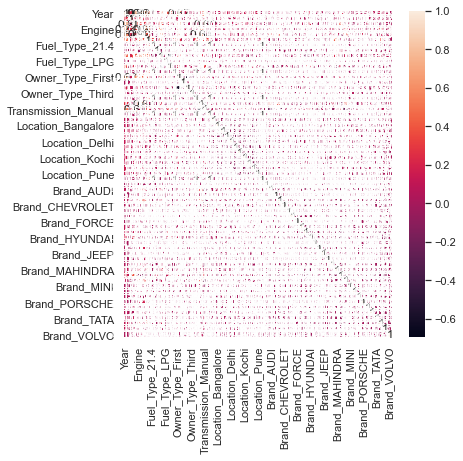

<IPython.core.display.Javascript object>

In [59]:
sns.set(rc={"figure.figsize": (6, 6)})
sns.heatmap(df_trainVariables.corr(), annot=True)

# Linear regression -> Fit Linear Model

In [60]:
regression_model = LinearRegression()

regression_model.fit(x_train, y_train)


LinearRegression()

<IPython.core.display.Javascript object>

# print coefficients of all 

In [61]:
for idx, col_name in enumerate(x_train.columns):
    print(
        "The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx])
    )

The coefficient for Year is 1.071635549771449
The coefficient for Kilometers_Driven is 2.2306944061981082e-06
The coefficient for Mileage is -0.10299409351718913
The coefficient for Engine is 0.002052902884358332
The coefficient for Power is 0.08903308103326424
The coefficient for Seats is -0.16649239998685061
The coefficient for Fuel_Type_21.4 is 0.36790436554451844
The coefficient for Fuel_Type_CNG is -478.410523344063
The coefficient for Fuel_Type_Diesel is -478.41857834482744
The coefficient for Fuel_Type_LPG is -476.78530796230115
The coefficient for Fuel_Type_Petrol is -478.9778832677168
The coefficient for Owner_Type_21.4 is 0.3679043629159935
The coefficient for Owner_Type_First is -477.8374197079935
The coefficient for Owner_Type_Fourth & Above is -478.44341924055874
The coefficient for Owner_Type_Second is -478.54656427575816
The coefficient for Owner_Type_Third is -477.76488968995926
The coefficient for Transmission_21.4 is 0.3679043639254189
The coefficient for Transmission

<IPython.core.display.Javascript object>

In [62]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.44520058042522237


<IPython.core.display.Javascript object>

# The score (R^2) for in-sample and out of sample

In [63]:
regression_model.score(x_train, y_train)

0.7940311064337455

<IPython.core.display.Javascript object>

In [64]:
#out of sample score (R^2)

regression_model.score(x_test, y_test)


0.7370518329543148

<IPython.core.display.Javascript object>

In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(x_train)
X_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

# print(y_pred)

# In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.9549649212939648


<IPython.core.display.Javascript object>

In [73]:
# Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

-519388.3592577941


<IPython.core.display.Javascript object>

In [66]:
# but this improves as the cost of 29 extra variables!
print(x_train.shape)
print(X_train2.shape)

(4952, 61)
(4952, 1892)


<IPython.core.display.Javascript object>


# Learning Regression evaluation metrics
    1. Mean Absolute Error
    2. Mean Square Error
    3. Root Mean Square Error
    4. R² Score
    5. Adjusted R² Score
    

In [67]:
# Mean Absolute Error (MAE)
# Average sum of the absolute difference between the actual and predicted values , this is independent of outliers.

# Initializing the model for regression. Fit it with the train data
model = LinearRegression()
model.fit(x_train, y_train)
# Get prediction results over test data
predictions = model.predict(x_test)
# Examine generated model with MAE Metric Evaluation
print(mean_absolute_error(y_test, predictions))

2.5151536883567185


<IPython.core.display.Javascript object>

In [68]:
# Mean Square Error (MSE)
# Summation of square of the square of the difference between actual and predicted values taken as a average
# this is helpful when we have outliars


# Importing all necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Defining our own MSE function
def mean_squared_error(actual, predictions):
    return ((predictions - actual) ** 2).mean()

# Initializing the model and fitting the model with train data
model = RandomForestRegressor(
               n_estimators = 100,
               criterion = 'mse'
        )
model.fit(x_train,y_train)

# Generating predictions over test data
predictions = model.predict(x_test)
predictions=predictions.reshape(2123,1)

# Evaluating the model using MSE Evaluation Metric
print(mean_squared_error(y_test, predictions))
print(mean_squared_error(y_test, predictions))


<ipython-input-68-6feb23c2f37e>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


Price    9.284153
dtype: float64
Price    9.284153
dtype: float64


<IPython.core.display.Javascript object>

In [69]:
# Root Mean Square Error (RMSE)
# it is square root of the mean squre error


# Defining RMSE function
def root_mean_squared_error(actual, predictions):
    return np.sqrt(mean_squared_error(actual, predictions))
# Initializing the model and fitting the model with train data
model = RandomForestRegressor(
               n_estimators = 100,
               criterion = 'mse'
        )
model.fit(x_train,y_train)
# Generating predictions over test data
predictions = model.predict(x_test)
predictions=predictions.reshape(2123,1)

# Evaluating the model using RMSE Evaluation Metric
print(root_mean_squared_error(y_test, predictions))


<ipython-input-69-eda90d382c78>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


Price    3.013772
dtype: float64


<IPython.core.display.Javascript object>

In [70]:
# For sklearn versions >= 0.22.0
print(mean_squared_error(y_test, predictions))

Price    9.082819
dtype: float64


<IPython.core.display.Javascript object>